In [8]:
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [10]:
# Нахождение подходящего априорного распределения
z = stats.norm.ppf(0.5 + 0.95 / 2)
print(z)
sigma = 1 / (4 * (z ** 2))
print(sigma)

1.95996398454
0.0650794429068


Найдем априорное распределение удовлетворяющее устовию $P( |\theta|<0.5 ) \geqslant 0.95$. Сопряженное для нормального распределения - тоже нормальное $N(a_0, \sigma^2_0)$.
Тогда $ a_0 = 0 $, а так же

$P(-0.5 < \theta < 0.5) = 0.95$

$P(-\frac{0.5}{\sigma_0} < \frac{\theta}{\sigma_0} < \frac{0.5}{\sigma_0}) = 0.95$

$P(-z < \frac{\theta}{\sigma_0} < z) = 0.95$, где $z = 1.95996398454$

Следовательно, $\frac{0.5}{\sigma_0} = z$

Откуда $\sigma^2_0 = \frac{1}{4z^2} = 0.0650794429068$

Строим график зависимости модуля отклонений от истинного значения $ \theta_0 = 0 $ в зависимотси от размера подвыборки для оценок максимального правдоподобия и построенной байесовской оценки.

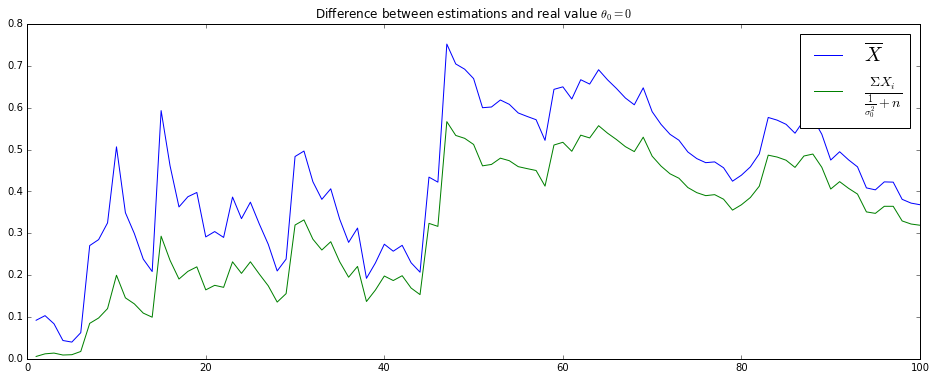

In [26]:
# Генерируем выборку
N = 100
sample = numpy.random.standard_cauchy(N)

# Инициализация
mean_est = numpy.zeros(N)
bayes_est = numpy.zeros(N)

# Считаем модуль отклонений
for n in range(1, N + 1):
    mean_est[n - 1] = abs(numpy.mean(sample[:n]))
    bayes_est[n - 1] = abs(numpy.sum(sample[:n]) / (1 / sigma + n))
    
# Строим основной график
plt.figure(figsize=(16, 6))
plt.title(r"Difference between estimations and real value $\theta_0 = 0$")

grid = numpy.arange(1, N + 1, 1)
plt.plot(grid, mean_est, label=r'$\overline{X}$')
plt.plot(grid, bayes_est, label=r'$\frac{\Sigma X_i}{\frac{1}{\sigma^2_0}+n}$')
plt.legend(prop={'size':20})

plt.show()    

Так как выборка из стандартного распределения Коши, то у оценки максимального правдоподобия $\overline X$ не существует математического ожидания, а значит оценка плохо оценивает параматр $ \theta_0 = 0 $. Тоже самое верно и для байесовской оценки, она лишь расположена ближе к 0, но ведет себя так же.